# **Unlocking Customer Insights: Market Segmentation with RFM Analysis**

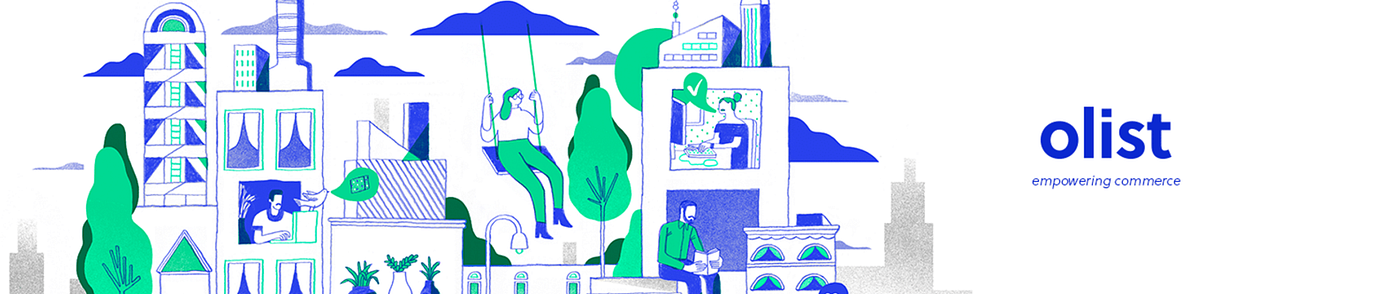

## **Project Background**


Olist, founded by Tiago Dalvi in Brazil in 2015, is a retail unicorn company. Olist is renowned for Olist Store, a platform that connects retailers with online markets, providing support to sellers to facilitate product sales and assisting in inventory management.

As a contemporary company, Olist Store recognizes the importance of data for business development. Therefore, it stores all sales history along with related product and customer information in a database. In this instance, I will conduct a data analysis within the Olist database, encompassing various tables, with the hope of uncovering significant insights during the analysis process.

## **Business Questions**

1.   What are the top 3 and bottom 3 products in terms of sales in the e-commerce business?
2.   How is the distribution of review ratings (on a scale of 1-5) from consumers for the offered products based on the country?
3.   Who are the sellers achieving the best performance in selling products to consumers?
4.   What are the trends in revenue for e-commerce product sales?
5.   Which city demonstrates the best product sales performance to consumers based on the generated revenue?
6.   When was the last transaction made by a consumer in e-commerce?
7.   How frequently, in the past few months, has a consumer made product purchases?
8.   What is the total amount spent by a customer within the time range of 2017-2018 in the e-commerce business ecosystem?



## **Importing Libraries for Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **DATA WRANGLING**

### **Data Gathering**

In [2]:
#Reading customer data from url

customers_df=pd.read_csv("https://raw.githubusercontent.com/jasmeenmhrn/Ecommerce-Analysis/main/customers_dataset.csv")
customers_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [3]:
#Reading orders data from url

orders_df=pd.read_csv("https://raw.githubusercontent.com/jasmeenmhrn/Ecommerce-Analysis/main/orders_dataset.csv")
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [4]:
#Reading order items data from url

order_items_df=pd.read_csv("https://raw.githubusercontent.com/jasmeenmhrn/Ecommerce-Analysis/main/order_items_dataset.csv")
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [5]:
#Reading products data from url

products_df=pd.read_csv("https://raw.githubusercontent.com/jasmeenmhrn/Ecommerce-Analysis/main/products_dataset.csv")
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [6]:
#Reading name of product in english from url

trans_products_df=pd.read_csv("https://raw.githubusercontent.com/jasmeenmhrn/Ecommerce-Analysis/main/product_category_name_translation.csv")
trans_products_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [7]:
#Reading sellers data from url

sellers_df=pd.read_csv("https://raw.githubusercontent.com/jasmeenmhrn/Ecommerce-Analysis/main/sellers_dataset.csv")
sellers_df.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [8]:
#Reading order review data from url

review_df=pd.read_csv("https://raw.githubusercontent.com/jasmeenmhrn/Ecommerce-Analysis/main/order_reviews_dataset.csv")
review_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

### **Data Assessing**

In [9]:
#Checking customers data

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
customers_df.duplicated().sum()

0

There are no issues with the customer data.



---



In [12]:
#Checking orders data

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
orders_df.duplicated().sum()

0

Issues with the orders data: presence of missing values and errors in the data type in the date section.


---





In [15]:
#Checking order items data

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
order_items_df.duplicated().sum()

0

There are no issues with the order items data.


---



In [17]:
#Checking products data

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [18]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [19]:
products_df.duplicated().sum()

0

Issues with the products data: presence of missing values.


---



In [20]:
#Checking products category data

trans_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [21]:
trans_products_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [22]:
trans_products_df.duplicated().sum()

0

There are no issues with the products category data.


---



In [23]:
#Checking sellers data

sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [24]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [25]:
sellers_df.duplicated().sum()

0

There are no issues with the sellers data.


---



In [26]:
#Checking review orders data

review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [27]:
review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [28]:
review_df.duplicated().sum()

0

In the review data, there are missing values in the comment column. However, since comments are not used for the analysis process, they are ignored.

---



**Assessing Data Summary**

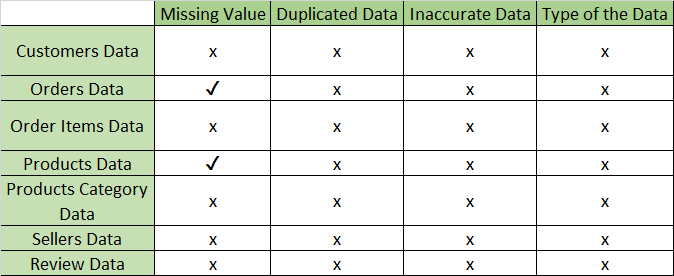

### **Data Cleaning**

**Orders Data**

In [29]:
#Handling missing values
#Due to the considerable number of missing values containing crucial information, they will be replaced with the 'Not Available' format

orders_df.fillna(value="Not Available", inplace=True)
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Products Data**

In [30]:
#Handling missing value

products_df.fillna(value="Not Available", inplace=True) #replace with "Not Available" to avoid altering the orders and order items data.
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_lenght         32951 non-null  object
 3   product_description_lenght  32951 non-null  object
 4   product_photos_qty          32951 non-null  object
 5   product_weight_g            32951 non-null  object
 6   product_length_cm           32951 non-null  object
 7   product_height_cm           32951 non-null  object
 8   product_width_cm            32951 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


## **EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION**

**1.   What are the top 3 and bottom 3 products in terms of sales in the e-commerce business?**

In [31]:
#Because the 'product_category_name' column in the 'products_df' is still in Brazilian Portuguese, it needs to be replaced with the English descriptions from the 'trans_products_df'
#Changing values in the 'product_category_name' column using the replace method.

products_df["product_category_name"] = products_df["product_category_name"].replace(
   trans_products_df.set_index("product_category_name")["product_category_name_english"])

products_df.head()

product_id product_category_name product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumery                40.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                   art                44.0   
2  96bd76ec8810374ed1b65e291975717f        sports_leisure                46.0   
3  cef67bcfe19066a932b7673e239eb23d                  baby                27.0   
4  9dc1a7de274444849c219cff195d0b71            housewares                37.0   

  product_description_lenght product_photos_qty product_weight_g  \
0                      287.0                1.0            225.0   
1                      276.0                1.0           1000.0   
2                      250.0                1.0            154.0   
3                      261.0                1.0            371.0   
4                      402.0                4.0            625.0   

  product_length_cm product_height_cm product_width_cm  
0              16.0              10.0             14.0  
1              30.0              18.0             20.0  
2              18.0               9.0             15.0  
3              26.0               4.0             26.0  
4              20.0              17.0             13.0

In [32]:
#Dropping several unused columns

orders_items_new = order_items_df.drop(["shipping_limit_date", "freight_value"], axis=1)
orders_items_new.head()


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id   price  
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   58.90  
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36  239.90  
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d  199.00  
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   12.99  
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87  199.90

In [33]:
#Comparing order_items and products data

orders_products_df=pd.merge(
    left=orders_items_new, #left dataframe
    right=products_df, #right dataframe
    how="left", #type of joint
    left_on="product_id", #pk for left dataframe
    right_on="product_id" #pk for right dataframe
)

orders_products_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id   price  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   58.90   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36  239.90   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d  199.00   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   12.99   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87  199.90   

  product_category_name product_name_lenght product_description_lenght  \
0            cool_stuff                58.0                      598.0   
1              pet_shop                56.0                      239.0   
2       furniture_decor                59.0                      695.0   
3             perfumery                42.0                      480.0   
4          garden_tools                59.0                      409.0   

  product_photos_qty product_weight_g product_length_cm product_height_cm  \
0                4.0            650.0              28.0               9.0   
1                2.0          30000.0              50.0              30.0   
2                2.0           3050.0              33.0              13.0   
3                1.0            200.0              16.0              10.0   
4                1.0           3750.0              35.0              40.0   

  product_width_cm  
0             14.0  
1             40.0  
2             33.0  
3             15.0  
4             30.0

In [34]:
#Creating a group by for best products based on 'product_category_name'

sum_of_products=orders_products_df.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_of_products.head()

product_category_name  order_item_id
0         bed_bath_table          13665
1        furniture_decor          11540
2          health_beauty          11081
3         sports_leisure           9932
4  computers_accessories           9874

<ipython-input-35-06777a386999>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_of_products.head(3), palette=colors, ax=ax[0])
<ipython-input-35-06777a386999>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_of_products.sort_values(by="order_item_id", ascending=True).head(3), palette=colors, ax=ax[1])


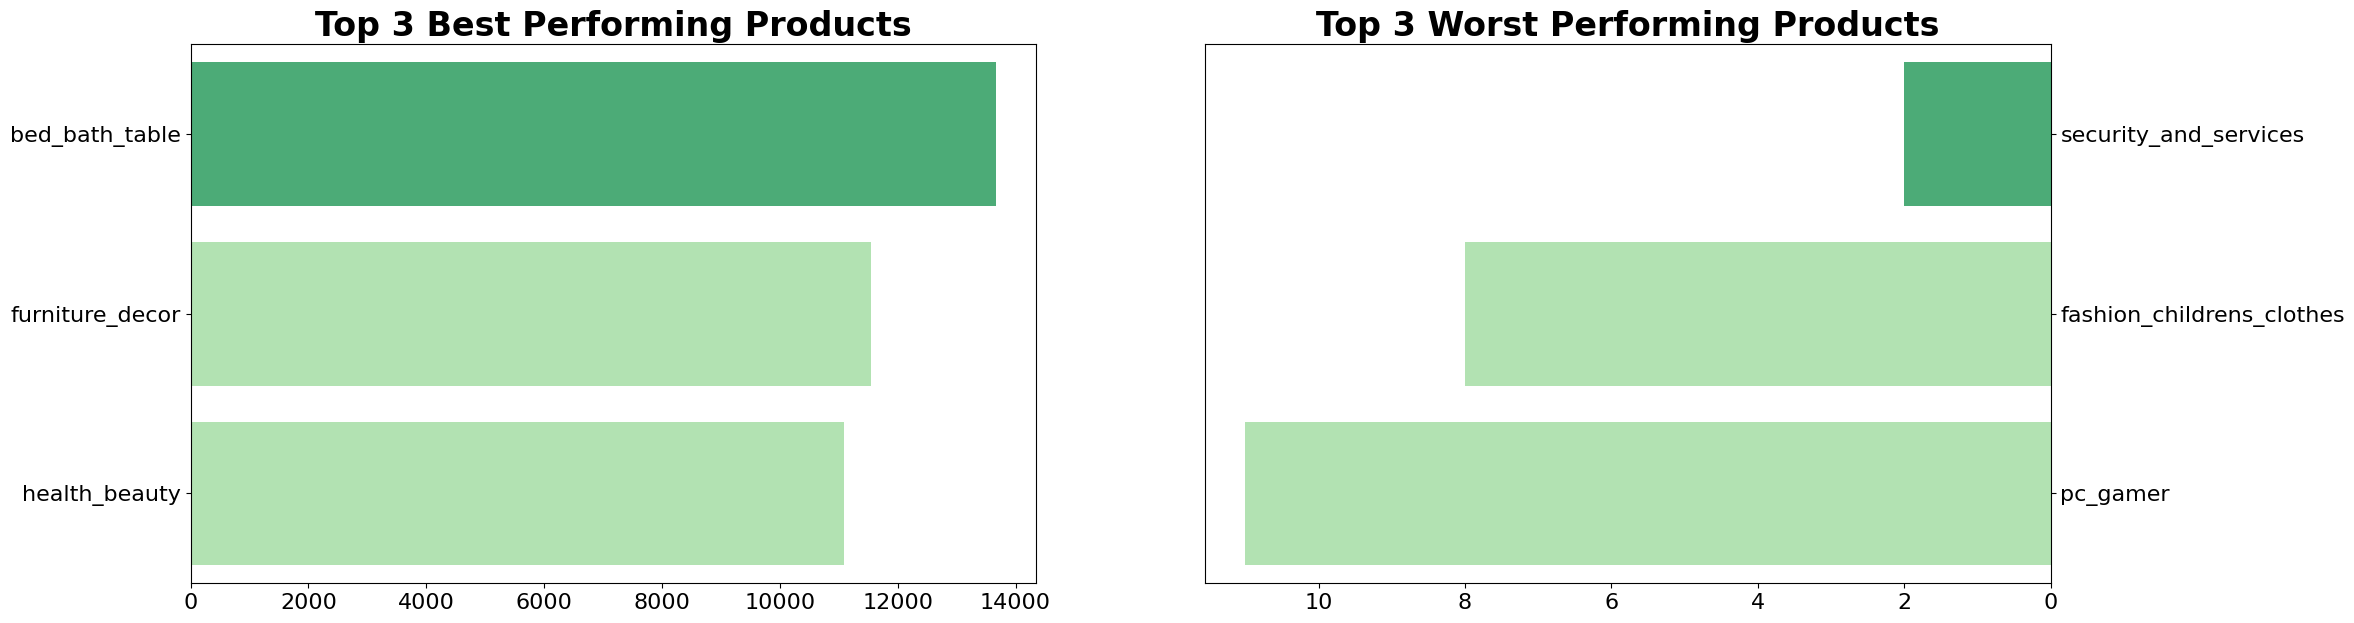

In [35]:
#Creating subplot visualization

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(24,7)) #Creating a subplot with 1 row and 2 columns of axes

#Define the colors palette

colors=["#3cbb75","#AAEAAA","#AAEAAA"]

#Bar chart best performing products

sns.barplot(x="order_item_id", y="product_category_name", data=sum_of_products.head(3), palette=colors, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Top 3 Best Performing Products", loc="center", fontsize=24, weight="bold")
ax[0].tick_params(axis ='y', labelsize=16)
ax[0].tick_params(axis ='x', labelsize=16)

#Bar chart worst performing products
sns.barplot(x="order_item_id", y="product_category_name", data=sum_of_products.sort_values(by="order_item_id", ascending=True).head(3), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Top 3 Worst Performing Products", loc="center", fontsize=24, weight="bold")
ax[1].invert_xaxis() #Reversing the x-axis
ax[1].yaxis.tick_right() #Shifting the y-axis ticks to the right on the second axis
ax[1].yaxis.set_label_position("right") #Adjusting the position of the y-axis labels (vertical) to the right on the second axis
ax[1].tick_params(axis ='y', labelsize=16)
ax[1].tick_params(axis ='x', labelsize=16)

plt.show()

**2.   How is the distribution of review ratings (on a scale of 1-5) from consumers for the offered products based on the country?**

In [36]:
#Dropping several unused columns

new_orders_df = orders_df.drop(["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"], axis=1)

#Comparing data from 'orders' and 'order_items_new' to obtain the quantity

all_orders_df=pd.merge(
    left=new_orders_df, #left dataframe
    right=orders_items_new, #right dataframe
    how="left", #type of joint
    left_on="order_id", #pk for left dataframe
    right_on="order_id" #pk for right dataframe
)

all_orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status  order_item_id                        product_id  \
0    delivered            1.0  87285b34884572647811a353c7ac498a   
1    delivered            1.0  595fac2a385ac33a80bd5114aec74eb8   
2    delivered            1.0  aa4383b373c6aca5d8797843e5594415   
3    delivered            1.0  d0b61bfb1de832b15ba9d266ca96e5b0   
4    delivered            1.0  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id   price  
0  3504c0cb71d7fa48d967e0e4c94d59d9   29.99  
1  289cdb325fb7e7f891c38608bf9e0962  118.70  
2  4869f7a5dfa277a7dca6462dcf3b52b2  159.90  
3  66922902710d126a0e7d26b0e3805106   45.00  
4  2c9e548be18521d1c43cde1c582c6de8   19.90

In [37]:
#Comparing data from 'all_orders' and 'review' to obtain the quantity

all_review_df=pd.merge(
    left=all_orders_df, #left dataframe
    right=review_df, #right dataframe
    how="left", #type of joint
    left_on="order_id", #pk for left dataframe
    right_on="order_id" #pk for right dataframe
)
#Renaming two columns
all_review_df=all_review_df.rename(columns={"order_item_id":"Product Quantity", "review_score":"Rating Score"})
all_review_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status  Product Quantity                        product_id  \
0    delivered               1.0  87285b34884572647811a353c7ac498a   
1    delivered               1.0  595fac2a385ac33a80bd5114aec74eb8   
2    delivered               1.0  aa4383b373c6aca5d8797843e5594415   
3    delivered               1.0  d0b61bfb1de832b15ba9d266ca96e5b0   
4    delivered               1.0  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id   price                         review_id  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   29.99  a54f0611adc9ed256b57ede6b6eb5114   
1  289cdb325fb7e7f891c38608bf9e0962  118.70  8d5266042046a06655c8db133d120ba5   
2  4869f7a5dfa277a7dca6462dcf3b52b2  159.90  e73b67b67587f7644d5bd1a52deb1b01   
3  66922902710d126a0e7d26b0e3805106   45.00  359d03e676b3c069f62cadba8dd3f6e8   
4  2c9e548be18521d1c43cde1c582c6de8   19.90  e50934924e227544ba8246aeb3770dd4   

   Rating Score review_comment_title  \
0           4.0                  NaN   
1           4.0     Muito boa a loja   
2           5.0                  NaN   
3           5.0                  NaN   
4           5.0                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1                               Muito bom o produto.  2018-08-08 00:00:00   
2                                                NaN  2018-08-18 00:00:00   
3  O produto foi exatamente o que eu esperava e e...  2017-12-03 00:00:00   
4                                                NaN  2018-02-17 00:00:00   

  review_answer_timestamp  
0     2017-10-12 03:43:48  
1     2018-08-08 18:37:50  
2     2018-08-22 19:07:58  
3     2017-12-05 19:21:58  
4     2018-02-18 13:02:51

In [38]:
#Creating a group-by for the best products based on the 'product_category_name'

sum_of_review_score=all_review_df.groupby("Rating Score")["Product Quantity"].sum().sort_values(ascending=False).reset_index()
sum_of_review_score["Product Quantity"] = round(sum_of_review_score["Product Quantity"]).astype(int)
sum_of_review_score["Rating Score"] = round(sum_of_review_score["Rating Score"]).astype(int)
sum_of_review_score.head()

Rating Score  Product Quantity
0             5             72790
1             4             24755
2             1             20316
3             3             11486
4             2              5051

In [39]:
#Creating interactive pie chart
fig = px.pie(
    sum_of_review_score, names="Rating Score", values="Product Quantity",
    color_discrete_sequence=["#3cbb75","#95d840"]
)

#Updating the layout to center-align the title
fig.update_layout(
    title="Distribution of Product Review Ratings",
    title_x=0.5,  #Determining the horizontal position of the title (0.5 signifies the center)
    autosize=False,
    width=850,
    height=500,
    title_font_size=22
)
fig.show()

**3.   Who are the sellers achieving the best performance in selling products to consumers?**

In [40]:
#Comparing data from 'sellers' and 'order_items_new'

sellers_new_df=pd.merge(
    left=orders_items_new, #left dataframe
    right=sellers_df, #right dataframe
    how="left", #type of joint
    left_on="seller_id", #pk for left dataframe
    right_on="seller_id" #pk for right dataframe
)
sellers_new_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id   price  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   58.90   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36  239.90   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d  199.00   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   12.99   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87  199.90   

   seller_zip_code_prefix    seller_city seller_state  
0                   27277  volta redonda           SP  
1                    3471      sao paulo           SP  
2                   37564  borda da mata           MG  
3                   14403         franca           SP  
4                   87900         loanda           PR

In [41]:
#Creating a group-by for the product quantity based on seller_state

sum_of_sellers_state=sellers_new_df.groupby("seller_state").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_of_sellers_state.head()

seller_state  order_item_id
0           SP          97062
1           MG          10298
2           PR          10266
3           RJ           5638
4           SC           4874

<ipython-input-42-7d7ea8410083>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




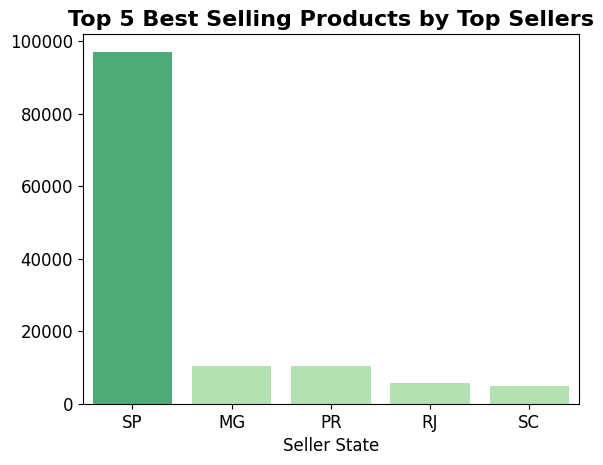

In [42]:
#Define the palette colors

colors=["#3cbb75","#AAEAAA","#AAEAAA","#AAEAAA","#AAEAAA"]

#Creating barplot

sns.barplot(x="seller_state", y="order_item_id", data=sum_of_sellers_state.head(5).sort_values(by="order_item_id", ascending=False), palette=colors)
plt.title("Top 5 Best Selling Products by Top Sellers", loc="center", fontsize=16, weight="bold")
plt.xlabel("Seller State", fontsize=12)
plt.ylabel(None)
plt.tick_params(axis ="y", labelsize=12)
plt.tick_params(axis ="x", labelsize=12)

plt.show()

**4.   What are the trends in revenue for e-commerce product sales?**

In [43]:
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [44]:
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [45]:
#Comparing data from 'sellers' and 'order_items_new'

trend_df=pd.merge(
    left=orders_df, #left dataframe
    right=orders_items_new, #right dataframe
    how="left", #type of joint
    left_on="order_id", #pk for left dataframe
    right_on="order_id" #pk for right dataframe
)
trend_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00            1.0   
1           2018-08-13 00:00:00            1.0   
2           2018-09-04 00:00:00            1.0   
3           2017-12-15 00:00:00            1.0   
4           2018-02-26 00:00:00            1.0   

                         product_id                         seller_id   price  
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   29.99  
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962  118.70  
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2  159.90  
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   45.00  
4  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   19.90

In [46]:
#Selecting specific columns
trend_df = trend_df.loc[:, ["order_id","customer_id","order_item_id","order_purchase_timestamp","price"]]

#Creating a 'total price' column obtained by multiplying quantity with the price per product
trend_df["total_price"]=trend_df["order_item_id"]*trend_df["price"]

trend_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

   order_item_id order_purchase_timestamp   price  total_price  
0            1.0      2017-10-02 10:56:33   29.99        29.99  
1            1.0      2018-07-24 20:41:37  118.70       118.70  
2            1.0      2018-08-08 08:38:49  159.90       159.90  
3            1.0      2017-11-18 19:28:06   45.00        45.00  
4            1.0      2018-02-13 21:18:39   19.90        19.90

In [47]:
#Checking missing value data

trend_df= trend_df.dropna(subset=["order_item_id"])
trend_df.isnull().sum()

order_id                    0
customer_id                 0
order_item_id               0
order_purchase_timestamp    0
price                       0
total_price                 0
dtype: int64

In [48]:
#Converting the data type of 'order_purchase_timestamp' from object to datetime

datetime_column=["order_purchase_timestamp"] #A list containing the names of columns to be converted to datetime data type

for columns in datetime_column: #'for' loop that will iterate through each element in the 'datetime_columns' set, namely 'order_date' and 'delivery_date'
  trend_df[columns]=pd.to_datetime(trend_df[columns])
#During each iteration of the loop, the values in the currently iterated column are converted to datetime data type using the pd.to_datetime function
#The result is then assigned back to that column in the DataFrame orders_df

#Checking information after the data type has been changed
trend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 113424
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112650 non-null  object        
 1   customer_id               112650 non-null  object        
 2   order_item_id             112650 non-null  float64       
 3   order_purchase_timestamp  112650 non-null  datetime64[ns]
 4   price                     112650 non-null  float64       
 5   total_price               112650 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 6.0+ MB


In [49]:
#Creating a new column 'month_year' based on the month and year
trend_df["month_year"] = trend_df["order_purchase_timestamp"].dt.strftime("%Y-%m")

#Grouping by month-year and calculating the total number of orders for each month-year
grouped_df = trend_df.groupby("month_year").agg({"order_item_id": "sum", "total_price": "sum"}).reset_index()

print(grouped_df)

   month_year  order_item_id  total_price
0     2016-09           10.0       435.23
1     2016-10          457.0     56103.79
2     2016-12            1.0        10.90
3     2017-01         1318.0    142077.30
4     2017-02         2252.0    269786.66
5     2017-03         3515.0    412016.43
6     2017-04         3094.0    399336.79
7     2017-05         4802.0    562388.09
8     2017-06         4094.0    471648.72
9     2017-07         5470.0    558035.60
10    2017-08         5947.0    655335.69
11    2017-09         5742.0    753890.26
12    2017-10         6614.0    766159.48
13    2017-11        10630.0   1176425.07
14    2017-12         7351.0    815042.73
15    2018-01         9748.0   1072699.91
16    2018-02         9405.0    973071.91
17    2018-03         9837.0   1109066.72
18    2018-04         9723.0   1130916.12
19    2018-05         9599.0   1137417.24
20    2018-06         8495.0    975084.01
21    2018-07         8386.0   1011982.19
22    2018-08         8445.0    94

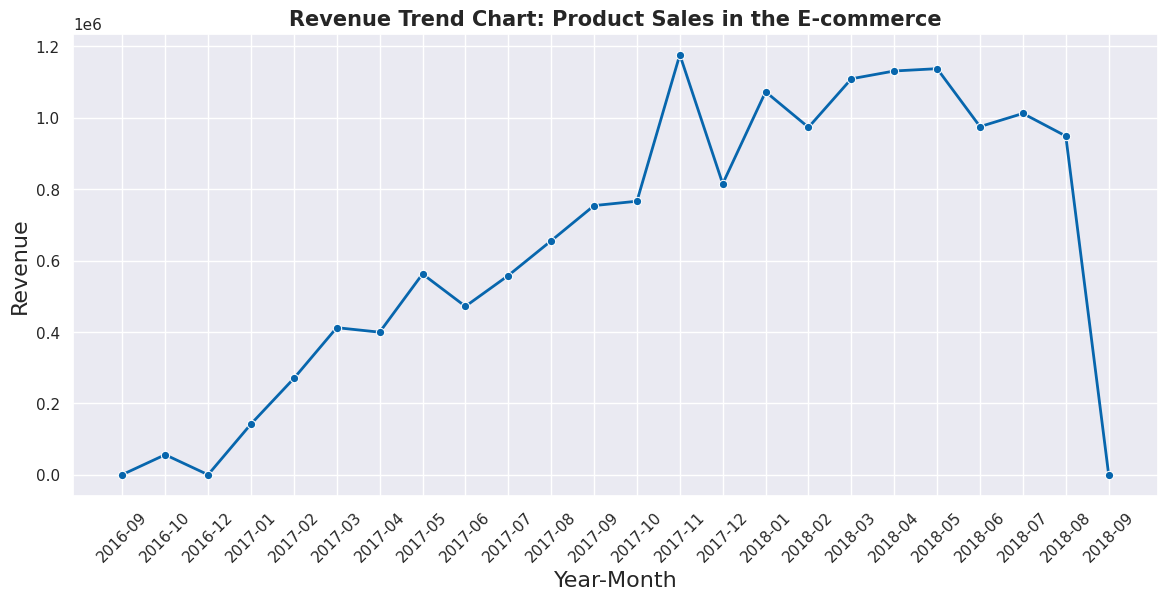

In [50]:
#Visualizing the Revenue Trend Data

sns.set(rc={'figure.figsize': (14, 6)})
sns.lineplot(x=grouped_df["month_year"], y=grouped_df["total_price"], marker="o", linewidth=2, color="#0766AD")
plt.title("Revenue Trend Chart: Product Sales in the E-commerce", loc="center", fontsize=15, weight="bold")
plt.xlabel("Year-Month", size=16)
plt.xticks(rotation=45)
plt.ylabel("Revenue", size=16)
plt.show()

**5.   Which city demonstrates the best product sales performance to consumers based on the generated revenue?**

In [51]:
#Comparing data from 'customers' and 'order_items_new'
cust_region_df=pd.merge(
    left=all_orders_df, #left dataframe
    right=customers_df, #right dataframe
    how="left", #type of joint
    left_on="customer_id", #pk for left dataframe
    right_on="customer_id" #pk for right dataframe
)

#Selecting specific columns
cust_region_df = cust_region_df.loc[:, ["order_id","customer_id","customer_city","order_item_id","price"]]

#Creating a 'total price' column obtained by multiplying quantity with the price per product
cust_region_df["total_price"]=cust_region_df["order_item_id"]*trend_df["price"]

cust_region_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

             customer_city  order_item_id   price  total_price  
0                sao paulo            1.0   29.99        29.99  
1                barreiras            1.0  118.70       118.70  
2               vianopolis            1.0  159.90       159.90  
3  sao goncalo do amarante            1.0   45.00        45.00  
4              santo andre            1.0   19.90        19.90

In [52]:
#Grouping the data by city

grouped_region_df = cust_region_df.groupby("customer_city").agg({"total_price": "sum"}).sort_values(by="total_price", ascending=False).reset_index()
grouped_region_df.head(10)

customer_city  total_price
0       sao paulo   2199609.73
1  rio de janeiro   1167734.25
2  belo horizonte    387535.24
3        brasilia    333780.40
4        curitiba    246378.03
5    porto alegre    229049.72
6        salvador    210565.66
7        campinas    210228.79
8       guarulhos    162078.80
9         goiania    144602.97

<ipython-input-53-b21a1f5d4552>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-53-b21a1f5d4552>:5: UserWarning:


The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.



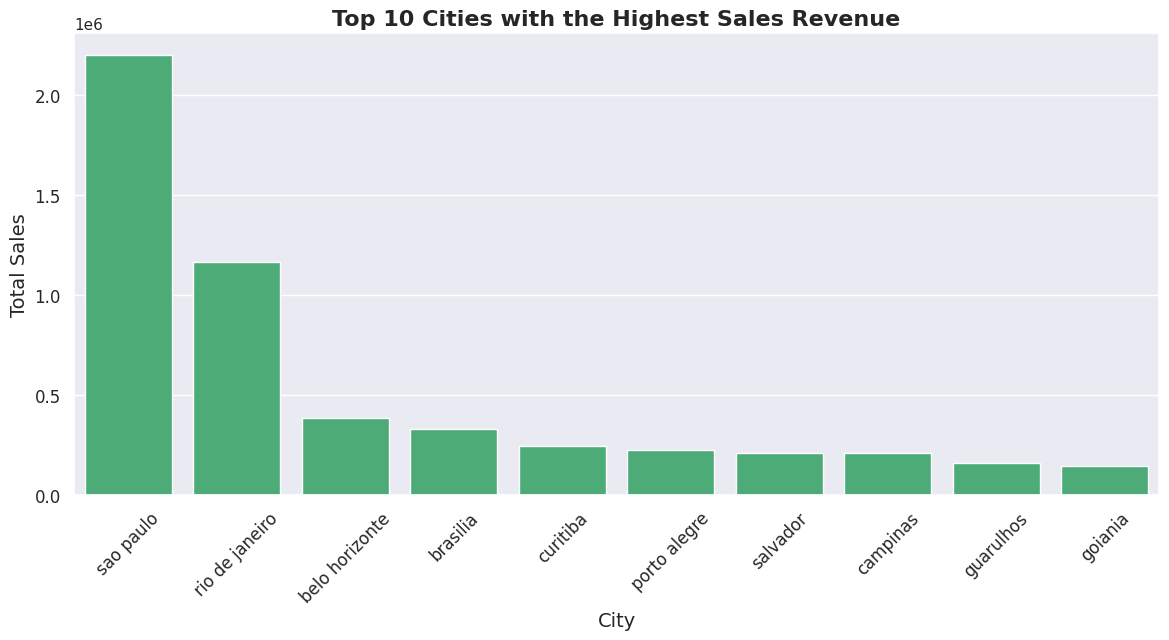

In [53]:
plt.figure(figsize=(14, 6))
colors=["#3cbb75"]

#Creating Barchart
sns.barplot(x="customer_city", y="total_price", data=grouped_region_df.head(10), palette=colors)  #Change the color palette
plt.title("Top 10 Cities with the Highest Sales Revenue", loc="center", fontsize=16, weight="bold")
plt.xlabel("City", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12, rotation=45)  #Rotate labels for better readability

plt.show()


**6.   When was the last transaction made by a consumer in e-commerce?**

**7.   How frequently, in the past few months, has a consumer made product purchases?**

**8.   What is the total amount spent by a customer within the time range of 2017-2018 in the e-commerce business ecosystem?**

To answer the three questions above, you can use RFM Analysis. RFM Analysis is a method used to segment and understand customer behavior based on three key factors: Recency, Frequency, and Monetary. This method is commonly employed in marketing and customer management to help businesses comprehend and respond to customer preferences and needs.

*   **Recency**: This parameter is used to examine when a customer last conducted a transaction.

*   **Frequency**: This parameter identifies how often a customer engages in transactions.
*   **Monetary**: This final parameter is used to identify how much revenue comes from that customer.

**RFM Analysis**

In [54]:
#Comparing data from 'customers' and 'trend_df'

cust_order_df=pd.merge(
    left=trend_df, #left dataframe
    right=customers_df, #right dataframe
    how="left", #type of joint
    left_on="customer_id", #pk for left dataframe
    right_on="customer_id" #pk for right dataframe
)

cust_order_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

   order_item_id order_purchase_timestamp   price  total_price month_year  \
0            1.0      2017-10-02 10:56:33   29.99        29.99    2017-10   
1            1.0      2018-07-24 20:41:37  118.70       118.70    2018-07   
2            1.0      2018-08-08 08:38:49  159.90       159.90    2018-08   
3            1.0      2017-11-18 19:28:06   45.00        45.00    2017-11   
4            1.0      2018-02-13 21:18:39   19.90        19.90    2018-02   

                 customer_unique_id  customer_zip_code_prefix  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149   
1  af07308b275d755c9edb36a90c618231                     47813   
2  3a653a41f6f9fc3d2a113cf8398680e8                     75265   
3  7c142cf63193a1473d2e66489a9ae977                     59296   
4  72632f0f9dd73dfee390c9b22eb56dd6                      9195   

             customer_city customer_state  
0                sao paulo             SP  
1                barreiras             BA  
2               vianopolis             GO  
3  sao goncalo do amarante             RN  
4              santo andre             SP

In [55]:
#Creating a group-by based on recency, frequency, and monetary factors
rfm_df = cust_order_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #Selecting last order date
    "order_item_id": "nunique", #Calculating the total number of orders
    "total_price": "sum" #Calculating the revenue
})

#Renaming column
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

customer_id max_order_timestamp  frequency  monetary
0  00012a2ce6f8dcda20d059ce98491703 2017-11-14 16:08:26          1     89.80
1  000161a058600d5901f007fab4c27140 2017-07-16 09:40:32          1     54.90
2  0001fd6190edaaf884bcaf3d49edf079 2017-02-28 11:06:43          1    179.99
3  0002414f95344307404f0ace7a26f1d5 2017-08-16 13:09:20          1    149.90
4  000379cdec625522490c315e70c7a9fb 2018-04-02 13:42:17          1     93.00

In [56]:
#Converting the data type of 'max_order_timestamp' from object to datetime

datetime_column=["max_order_timestamp"] #A list containing the names of columns to be converted to datetime data type

for columns in datetime_column: #'for' loop that will iterate through each element in the 'datetime_columns' set, namely 'order_date' and 'delivery_date'
  rfm_df[columns]=pd.to_datetime(rfm_df[columns])
#During each iteration of the loop, the values in the currently iterated column are converted to datetime data type using the pd.to_datetime function
#The result is then assigned back to that column in the DataFrame orders_df

#Checking information after the data type has been changed
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          98666 non-null  object        
 1   max_order_timestamp  98666 non-null  datetime64[ns]
 2   frequency            98666 non-null  int64         
 3   monetary             98666 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.0+ MB


In [57]:
#Calculating the recency of the last customer transaction in days

#Converting the 'max_order_timestamp' column in the DataFrame rfm_df from datetime format to date format
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date

#Calculating the latest date in the order data (orders_df)
recent_date = cust_order_df["order_purchase_timestamp"].dt.date.max() #Selecting the maximum date from the 'order_date' column in date format

#Adding a new column 'recency' to the DataFrame rfm_df
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days) #Calculating recency (time since the last purchase)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True) #Removing the 'max_order_timestamp' column from the DataFrame rfm_df
rfm_df.head()


customer_id  frequency  monetary  recency
0  00012a2ce6f8dcda20d059ce98491703          1     89.80      293
1  000161a058600d5901f007fab4c27140          1     54.90      414
2  0001fd6190edaaf884bcaf3d49edf079          1    179.99      552
3  0002414f95344307404f0ace7a26f1d5          1    149.90      383
4  000379cdec625522490c315e70c7a9fb          1     93.00      154

<ipython-input-58-aa5bd5107b1d>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-58-aa5bd5107b1d>:7: UserWarning:


The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.

<ipython-input-58-aa5bd5107b1d>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-58-aa5bd5107b1d>:15: UserWarning:


The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.

<ipython-input-58-aa5bd5107b1d>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-

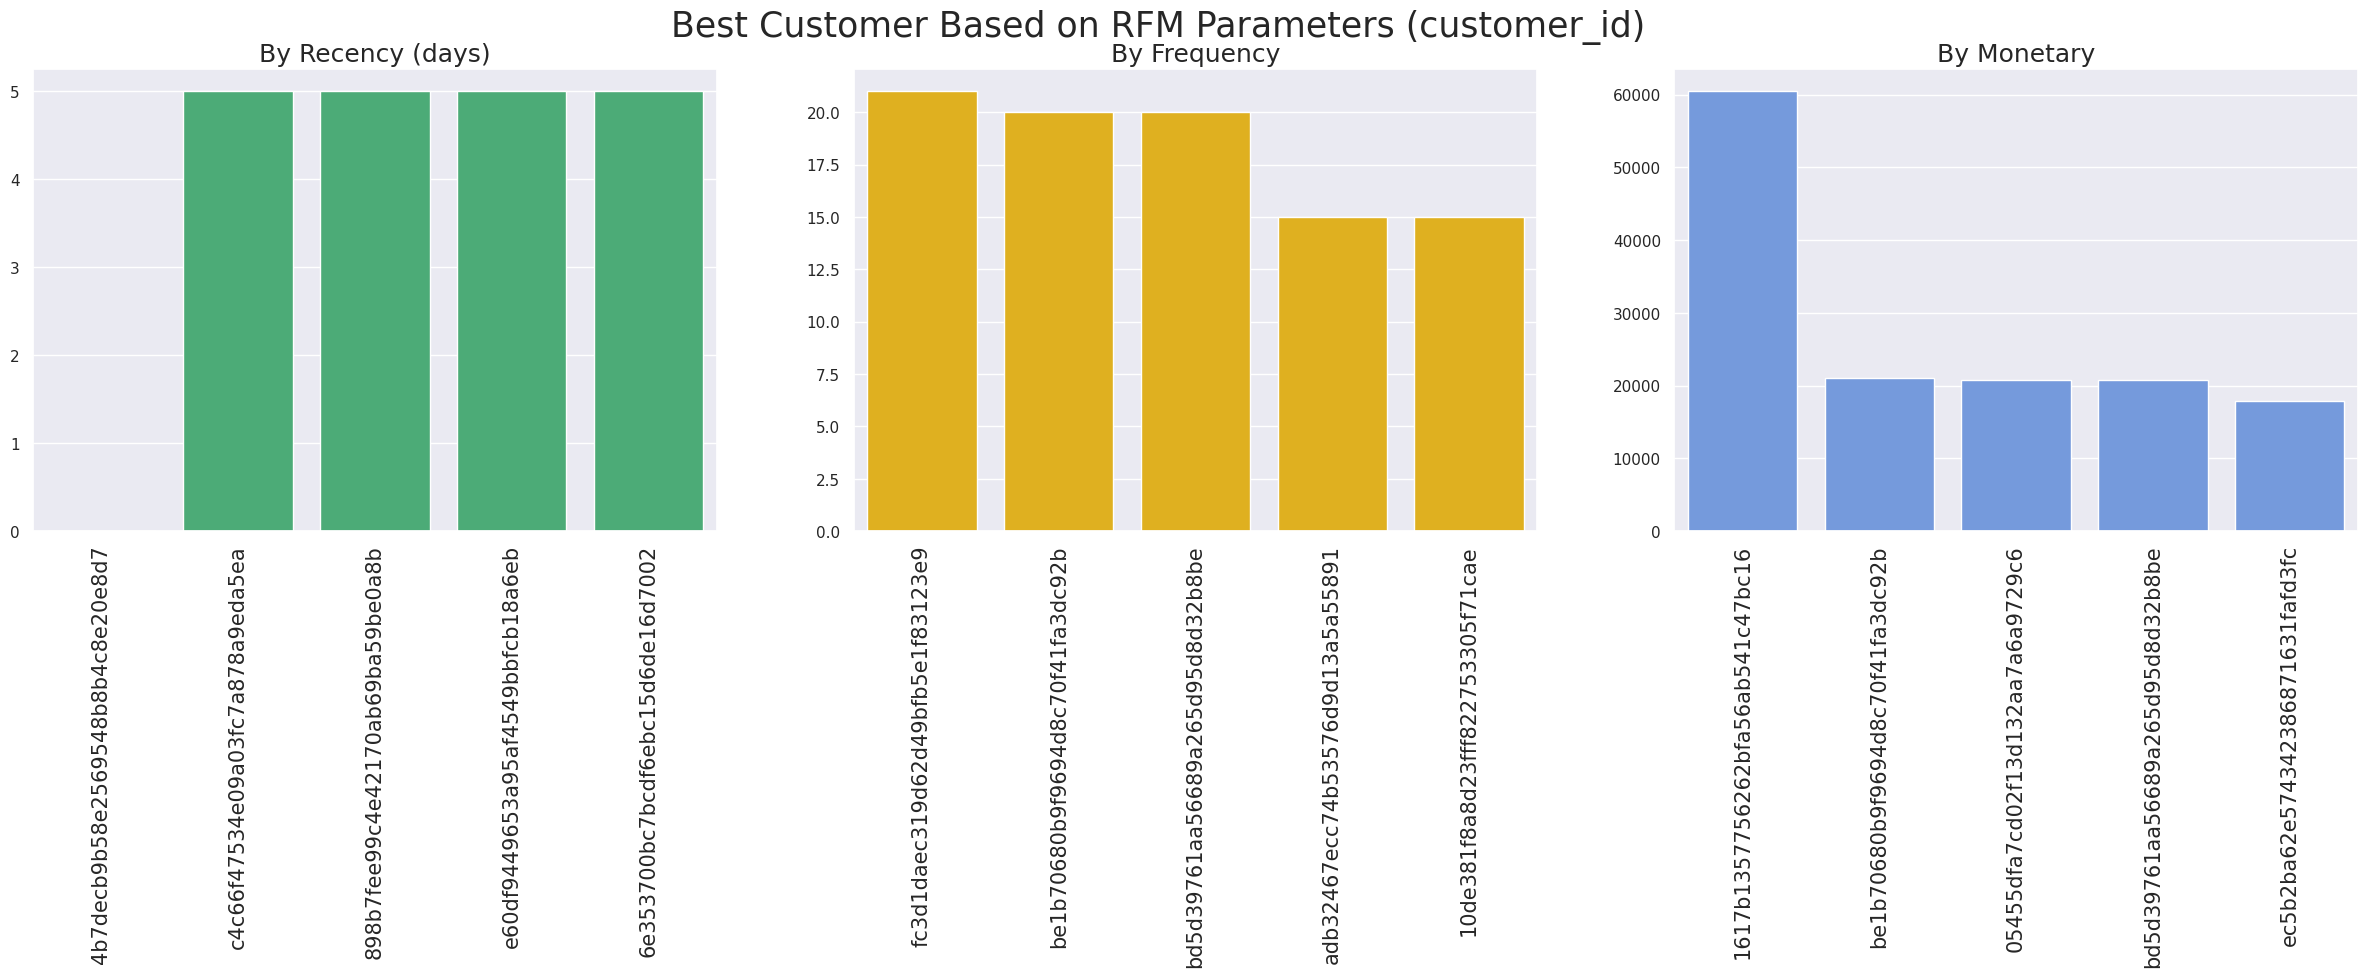

In [58]:
#RFM Visualization

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

#BARPLOT 1
colors=["#3cbb75"]
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)

#BARPLOT 2
colors1=["#FFC000"]
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors1, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)

#BARPLOT 3
colors2=["#6495ED"]
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors2, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=25)
plt.show()

In [59]:
#Rank customers
rfm_df["R_rank"] = rfm_df["recency"].rank(ascending=False)
rfm_df["F_rank"] = rfm_df["frequency"].rank(ascending=True)
rfm_df["M_rank"] = rfm_df["monetary"].rank(ascending=True)

#Normalization Rank Customers
rfm_df["R_rank_norm"] = (rfm_df["R_rank"] / rfm_df["R_rank"].max()) * 100
rfm_df["F_rank_norm"] = (rfm_df["F_rank"] / rfm_df["F_rank"].max()) * 100
rfm_df["M_rank_norm"] = (rfm_df["M_rank"] / rfm_df["M_rank"].max()) * 100

#Rremoving unused columns
rfm_df.drop(columns=["R_rank", "F_rank", "M_rank"], inplace=True)

#Showing the first five rows of the DataFrame
rfm_df.head()

customer_id  frequency  monetary  recency  \
0  00012a2ce6f8dcda20d059ce98491703          1     89.80      293   
1  000161a058600d5901f007fab4c27140          1     54.90      414   
2  0001fd6190edaaf884bcaf3d49edf079          1    179.99      552   
3  0002414f95344307404f0ace7a26f1d5          1    149.90      383   
4  000379cdec625522490c315e70c7a9fb          1     93.00      154   

   R_rank_norm  F_rank_norm  M_rank_norm  
0    34.391786    45.032737    49.784627  
1    16.862445    45.032737    30.916932  
2     2.844952    45.032737    79.060669  
3    21.187643    45.032737    72.519916  
4    67.237954    45.032737    52.201873

In [60]:
#Calculating RFM Score
rfm_df["RFM_Score"] = 0.15*rfm_df["R_rank_norm"]+0.28*rfm_df["F_rank_norm"]+0.57*rfm_df["M_rank_norm"]
rfm_df["RFM_Score"] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[["customer_id", "RFM_Score"]].head(10)

customer_id  RFM_Score
0  00012a2ce6f8dcda20d059ce98491703       2.31
1  000161a058600d5901f007fab4c27140       1.64
2  0001fd6190edaaf884bcaf3d49edf079       2.91
3  0002414f95344307404f0ace7a26f1d5       2.86
4  000379cdec625522490c315e70c7a9fb       2.62
5  0004164d20a9e969af783496f3408652       1.71
6  000419c5494106c306a97b5635748086       1.54
7  00046a560d407e99b969756e0b10f282       2.79
8  00050bf6e01e69d5c0fd612f1bcfb69c       2.01
9  000598caf2ef4117407665ac33275130       4.17

In [61]:
#Labeling customer categories
"""
RFM Score > 4,5 : VIP Customers
RFM Score between 4 s.d. 4,5 : Gold Customers
RFM Score between 3 s.d. 4 : Silver Customers
RFM Score between 1,5 s.d. 3 : Bronze Customers
RFM Score between < 1,5 : Dormant Customers
"""
rfm_df["customer_segment"] = np.where(rfm_df["RFM_Score"] > 4.5, "VIP Customer",(np.where(rfm_df["RFM_Score"] > 4,"Gold Customer",(np.where(rfm_df["RFM_Score"] > 3,"Silver Customer", np.where(rfm_df["RFM_Score"] > 1.5,"Bronze Customer", "Dormant Customer"))))))
rfm_df[["customer_id", "RFM_Score", "customer_segment"]].head(10)

customer_id  RFM_Score customer_segment
0  00012a2ce6f8dcda20d059ce98491703       2.31  Bronze Customer
1  000161a058600d5901f007fab4c27140       1.64  Bronze Customer
2  0001fd6190edaaf884bcaf3d49edf079       2.91  Bronze Customer
3  0002414f95344307404f0ace7a26f1d5       2.86  Bronze Customer
4  000379cdec625522490c315e70c7a9fb       2.62  Bronze Customer
5  0004164d20a9e969af783496f3408652       1.71  Bronze Customer
6  000419c5494106c306a97b5635748086       1.54  Bronze Customer
7  00046a560d407e99b969756e0b10f282       2.79  Bronze Customer
8  00050bf6e01e69d5c0fd612f1bcfb69c       2.01  Bronze Customer
9  000598caf2ef4117407665ac33275130       4.17    Gold Customer

In [62]:
#Creating interactive pie chart
fig = px.pie(
    rfm_df, names="customer_segment",
    color_discrete_sequence=["#3cbb75","#95d840"]
)

#Updating the layout to center-align the title
fig.update_layout(
    title="Composition (%) of Customer Segmentation",
    title_x=0.5,  #Determining the horizontal position of the title (0.5 signifies the center)
    autosize=False,
    width=850,
    height=500,
    title_font_size=22
)
fig.show()

## **CONCLUSIONS**

**1.   What are the top 3 and bottom 3 products in terms of sales in the e-commerce business?**

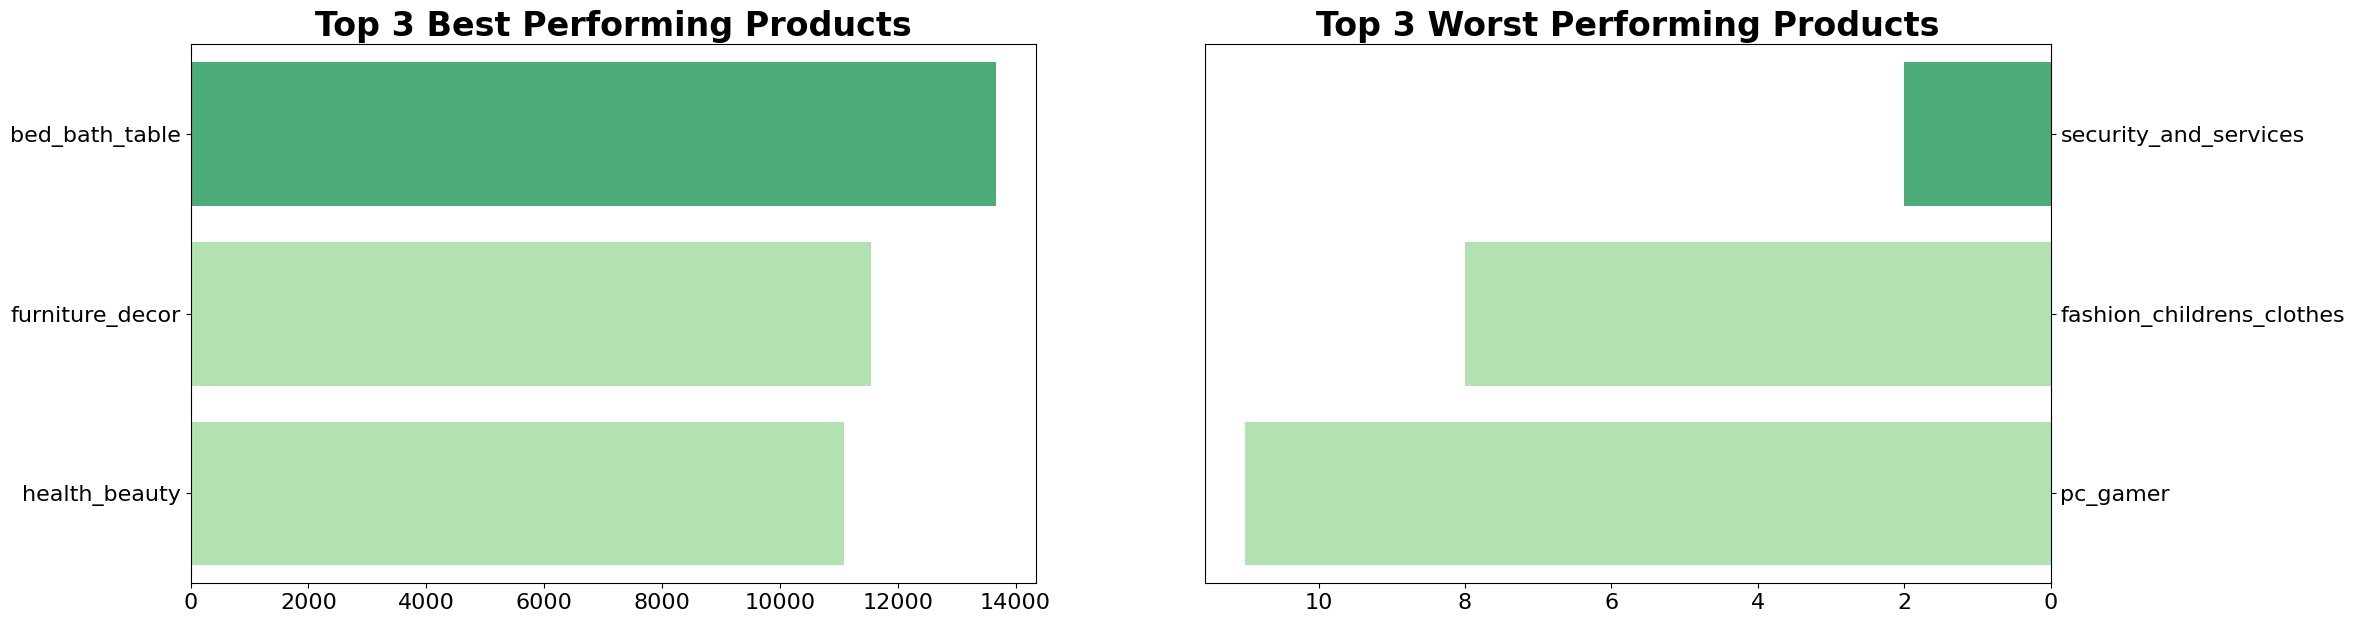

The above bar chart visualization indicates the top three product categories in terms of sales: bed_bath_table with 13,665 products, furniture_decor with 11,540 products, and in the third position, the health_beauty category with sales of 11,081 products. Furthermore, for the three product categories with the lowest sales, there are security_services with 2 products, fashion_childrens_clothes with 8 products, and pc_gamer with 11 products.

Based on the analysis of product sales in this case, it is advisable for the company to conduct a thorough evaluation of the product categories with the lowest sales, such as security_services, fashion_childrens_clothes, and pc_gamer. Special marketing and promotional strategies may be needed to enhance customer interest and awareness of products in these categories. Additionally, the company may consider diversification or refreshing these products to attract a broader market segment. And for product categories with the highest sales, such as bed_bath_table, furniture_decor, and health_beauty, the company can continue successful marketing efforts and strengthen the brand presence in these categories.

**2.   How is the distribution of review ratings (on a scale of 1-5) from consumers for the offered products based on the country?**

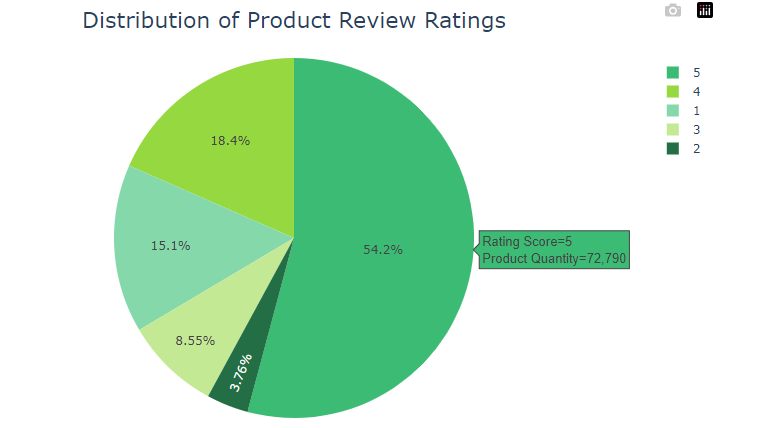

From the above pie chart visualization, it can be concluded that product and service reviews are predominantly dominated by a rating of 5, reaching 54.2%. Rating 4 follows with a percentage of 18.4%, followed by rating 3 at 15.1%, rating 2 at 8.55%, and rating 1 at 3.76%. Although overall product reviews show the dominance of ratings 4 and 5 with an accumulation of 72.6%, the company is advised to focus on improving product quality by addressing aspects that received lower ratings, especially in ratings 1 and 2.

Identify the main issues from these reviews and implement concrete improvements. Strengthen customer interaction through feedback channels by encouraging consumers to provide further input. Next, implement best practices from products or services that receive high ratings, and enhance transparency by communicating the implemented improvements. With this strategy, it is expected that the company can improve product quality, enhance customer relations, and increase overall satisfaction.







**3.   Who are the sellers achieving the best performance in selling products to consumers?**

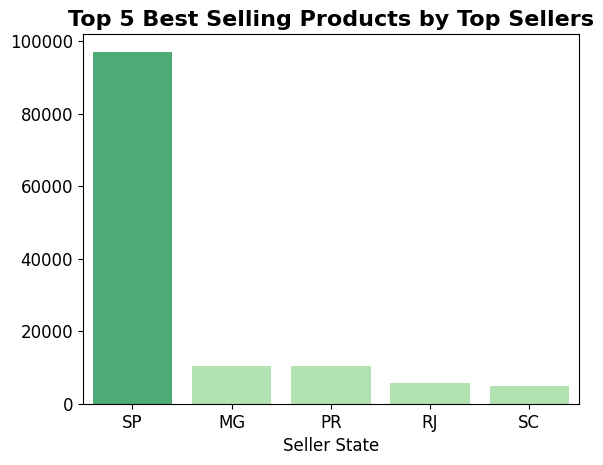

Based on the results of the above bar chart visualization, it is evident that sellers in São Paulo (SP) exhibit the best performance among sellers in 23 other cities in Brazil, with a total of 97,062 products sold. The second position is held by sellers in Minas Gerais (MG) with a total of 10,298 products sold, followed closely by sellers in Paraná (PR) with a total of 10,266 products sold. In the fourth position are sellers in Rio de Janeiro (RJ) with a total of 5,638 products sold, and in the fifth position, there are sellers in Santa Catarina (SC) with a total of 4,874 products sold.

Here are some recommendations that can be implemented to improve business performance. First, the company can expand its market with a more focused strategy in cities that have not yet reached their maximum sales potential. Second, sales optimization in cities like São Paulo and Minas Gerais can be achieved by identifying key success factors and applying them in other regions. Analyzing competition in cities with low sales can provide insights for adjusting strategies. Improving customer service, quick responses to inquiries or complaints, is also a crucial aspect that can be enhanced in cities with low performance. Finally, for sellers with the best performance, awards or bonuses can be effective incentives to motivate sellers in other cities.

**4.   What are the trends in revenue for e-commerce product sales?**

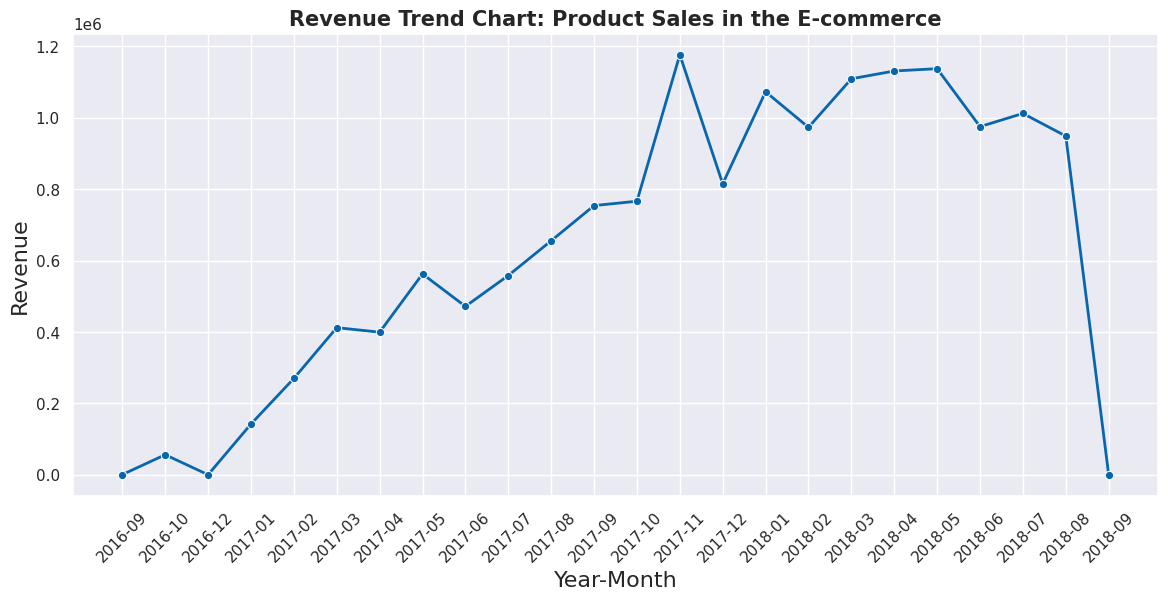

From the above line chart visualization, it can be observed that the revenue from product sales experienced relatively stable growth from September 2016 to November 2017. However, starting from December 2017 to September 2018, the graph shows more significant fluctuations. In fact, for sales in August 2018 to September 2019, the graph experienced a drastic decline, from 948,662.77 BRL to 145 BRL. The company is advised to delve deeper into the factors causing revenue fluctuations during the period from December 2017 to September 2018, especially the significant drop from August 2018 to September 2019.

Evaluation steps regarding these factors, such as changes in marketing strategy, competitive dynamics, or market conditions, can help identify the causes of fluctuations and develop performance improvement strategies. Additionally, strengthening risk management and diversifying sources of income may need to be considered to reduce the potential adverse impact of fluctuations. Furthermore, implementing corrective actions and policy adjustments can have a positive impact on income stability and future business growth.

**5.   Which city demonstrates the best product sales performance to consumers based on the generated revenue?**

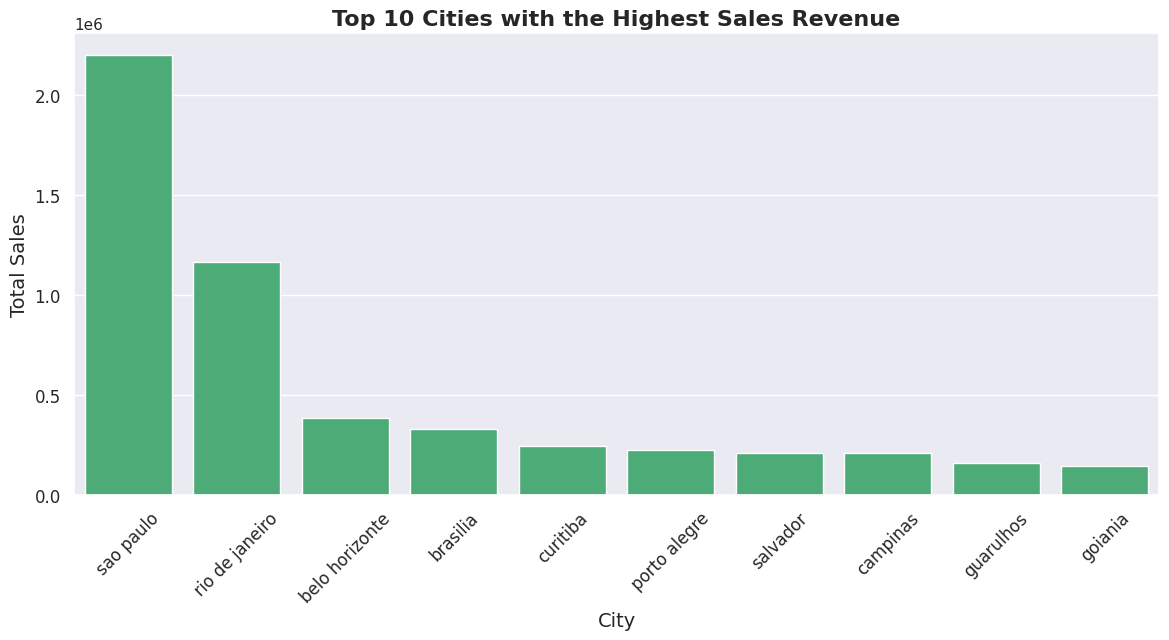

If in the previous business question number 3 we discussed the sellers with the best product sales, here is a bar chart visualization of customer data showing the best purchasing performance based on the generated revenue. São Paulo occupies the first position with a generated revenue of 2,199,609.73 BRL, followed by Rio de Janeiro with 1,167,734.25 BRL. The third position goes to Belo Horizonte with a revenue of 387,535.24 BRL, followed sequentially by Brasília, Curitiba, Porto Alegre, Salvador, Campinas, Guarulhos, and Goiânia.

Based on this explanation, several strategic steps can be recommended to improve sales results and optimize revenue potential in various cities. The company can explore further opportunities in São Paulo, which shows the highest purchasing performance, by implementing a more intensive marketing strategy. Furthermore, developing more targeted and relevant marketing strategies for each city with low performance can help enhance the attractiveness of products or services. Implementing special promotions, discounts, or unique offers tailored to the characteristics of each city may also stimulate sales growth. Additionally, collaboration with local residents or involvement in the local community can help build trust and enhance the company's presence at the local level.

**6.   When was the last transaction made by a consumer in e-commerce?**

**7.   How frequently, in the past few months, has a consumer made product purchases?**

**8.   What is the total amount spent by a customer within the time range of 2017-2018 in the e-commerce business ecosystem?**

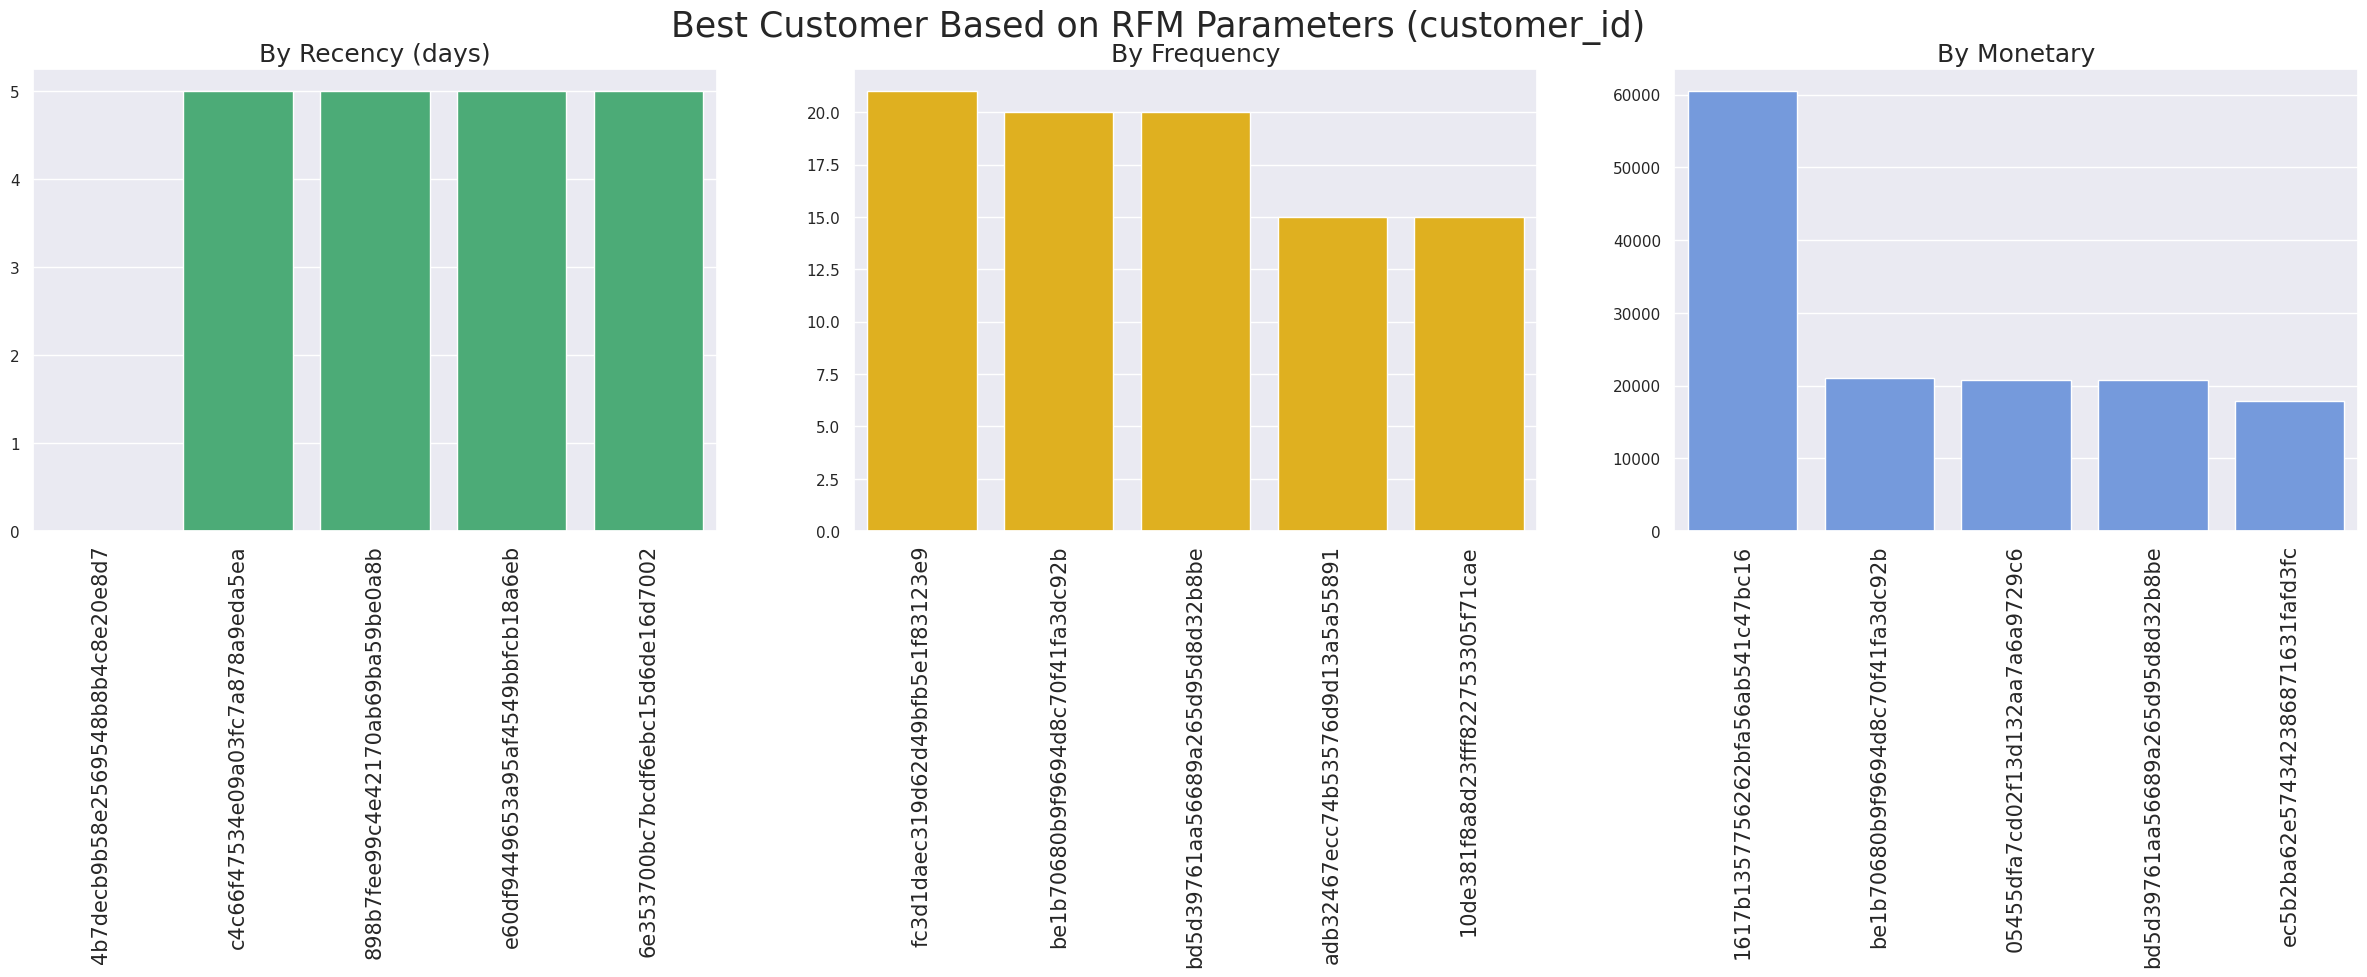

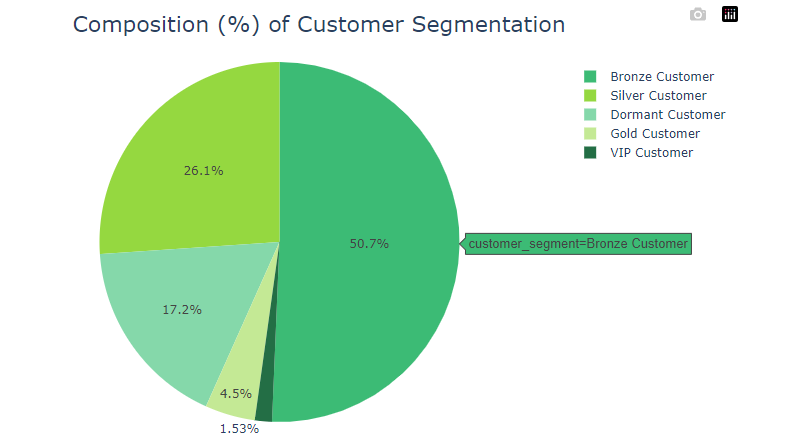

Examining the composition (%) of customer segmentation, the largest segment is dominated by Bronze Customers at 45.5%, followed by Silver Customers at 35.7%. Meanwhile, the combined proportion of VIP Customers and Gold Customers only reaches 10.46%. Although the combined proportion of VIP Customers and Gold Customers is not significant, the company can provide special treatment to these segments through product recommendations based on their preferences, premium membership offers, exclusive shopping vouchers, and attractive discounts. The goal is to maintain their engagement in transactions as both segments contribute significantly to the company's revenue and profit.

Specific efforts can be directed towards Silver Customers to increase their membership level to Gold Customers by offering enticing promotions or discounts, encouraging this customer segment to increase their transaction frequency. Meanwhile, for Bronze Customers and Dormant Customers, approaches can be made through the introduction of new products, providing opportunities to try or demo products, building a positive brand image, or through intensive promotional campaigns to rekindle the interest of these segments in transactions.







In [63]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.9 MB/s eta 0:00:00


In [64]:
!wget -q -O - ipv4.icanhazip.com

34.106.61.204


In [65]:
!streamlit run submission_project_dicoding.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: submission_project_dicoding.py
npx: installed 22 in 3.888s
your url is: https://slow-mice-lead.loca.lt
^C
